<a href="https://colab.research.google.com/github/Legacy560/MLTSA25_RWolynetz/blob/main/python_bootcamp2.13.25_MLTSA25_RWolynetz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
my_str = "hello"


In [ ]:
type(my_str)

str

In [ ]:
print(my_str)

hello


In [ ]:
my_int = 36

In [ ]:
type(my_int)

int

In [ ]:
my_float = 36.
type(my_float)

float

In [ ]:
print(my_float)

36.0


In [ ]:
my_int*my_float #Python will make the result whatever the most complex variable type is.

1296.0

In [ ]:
my_int * my_str

'hellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohellohello'

In [ ]:
helloWorld = "Hello" + " World!"
print(helloWorld)

Hello World!


In [ ]:
import numpy as np #The only package that has a paper on nature

In [ ]:
myNparr = np.array([1,2,3])
myNparr

array([1, 2, 3])

In [ ]:
my_int * myNparr

array([ 36,  72, 108])

In [ ]:
my_bool = True

In [ ]:
0==1

False

In [ ]:
my_int == 1

False

In [ ]:
my_int != 6

True

In [ ]:
if my_int != 6:
  print("my_int is not equal to 6")
else:
  print("it was 6")
  #remember python is indentation-sensitive

my_int is not equal to 6


In [ ]:
type(my_int)

int

In [ ]:
myNparr.dtype #attribute

dtype('int64')

In [ ]:
myNparr.max()

3

In [ ]:
myNparr.argmax() #returns location of largest number

2

In [ ]:
myNparr[2]

3

In [ ]:
myNparr[-1]

3

In [ ]:
myNparr[1:] #Colon indicates a range. Allows us to select a subset of the dataset. This starts at index 1 and goes to the end.

array([2, 3])

In [ ]:
myNparr[1:3]

array([2, 3])

In [ ]:
list(range(1,4))

[1, 2, 3]

In [ ]:
for a in range(1,4):
  print(sum(np.arange(0,a)))
  #arange returns a range as a numpy array

0
1
3


In [ ]:
def allOds(lastNum):
  """
  Finds(prints) all odd numbers between 0 and lastNum
  input:
    lastNum: (int) last number in list
  Return:
    a list of odd numbers

  """
  odds = []
  for i in range(0,lastNum+1):
    if i % 2 == 1:
      odds.append(i)
      #print(odds)
  return odds
allOds(10)


[1, 3, 5, 7, 9]

In [ ]:
allOds? #Returns docstring of the function.

# Exercise:
Create a function that takes a word and checks if it's a palindrome.


In [ ]:
def checkPali(word):
  """
  Checks if word is palindrome.
  Input:
    word(str): imput word
  Output:
    True if palindrome. False otherwise.
  """

  #Check if word is string
  '''
  if(type(word) != str):
    print("Not a string")
    '''
  assert type(word) == str, "Not a string" #This throws an error prints not a string if word is not a string.
  if word == word[::-1].lower(): #Python is case-sensitive.
    return True
  else:
    return False
  return



In [ ]:
checkPali(9)

AssertionError: Not a string

In [ ]:
word = "racecar"
word[::-1]

'racecar'

## Day 2: 2/13/24 Fitting lines and regression


In [9]:
import pandas as pd
pd.read_csv?


In [16]:
movies = pd.read_csv("https://raw.githubusercontent.com/fedhere/PyBOOT/refs/heads/master/data/movies.dat",delimiter = "::", index_col = 0, names = ["Film", "Genre"])
#Reads a csv file into a pandas dataframe
#First arg = name of the file or the url

<ipython-input-16-9ddd35b4e8be>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv("https://raw.githubusercontent.com/fedhere/PyBOOT/refs/heads/master/data/movies.dat",delimiter = "::", index_col = 0, names = ["Film", "Genre"])


In [17]:
movies.head()

,Film,Genre
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [18]:
movies.tail(
)

,Film,Genre
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama
3951,Two Family House (2000),Drama
3952,"Contender, The (2000)",Drama|Thriller


In [20]:
movies.columns

Index(['Film', 'Genre'], dtype='object')

In [22]:
movies.loc[:,"Film"] #Extracts by name

,Film
1,Toy Story (1995)
2,Jumanji (1995)
3,Grumpier Old Men (1995)
4,Waiting to Exhale (1995)
5,Father of the Bride Part II (1995)
...,...
3948,Meet the Parents (2000)
3949,Requiem for a Dream (2000)
3950,Tigerland (2000)
3951,Two Family House (2000)


In [23]:
movies.iloc[:,0] #Extracts by index

,Film
1,Toy Story (1995)
2,Jumanji (1995)
3,Grumpier Old Men (1995)
4,Waiting to Exhale (1995)
5,Father of the Bride Part II (1995)
...,...
3948,Meet the Parents (2000)
3949,Requiem for a Dream (2000)
3950,Tigerland (2000)
3951,Two Family House (2000)


Let's parce the film name strings to extract the year of each movie.

In [29]:
#String slicing
int(movies.loc[1,"Film"].split("(")[1].strip(")")) #Index to get the year

1995

In [34]:
def getYear(mName):
  """
  Extracts the year from a film name.
  Input:
    mName(str): film name
  Output:
    year of film

  """
  return int(mName.split("(")[-1].strip(")")) #-1 ensures we get the last index (year) every time.

#Now we can use a method from the data frame to iterate through the whole dataset.

movies["year"] = movies["Film"].map(getYear)
#.map takes a function and applies it to the whole dataset.
movies.head()

,Film,Genre,year
1,Toy Story (1995),Animation|Children's|Comedy,1995
2,Jumanji (1995),Adventure|Children's|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama,1995
5,Father of the Bride Part II (1995),Comedy,1995


In [44]:
moviesByYear = movies.groupby("year").count() #This will count number of movies each year
#Returns groupby object. Groups by the selected column

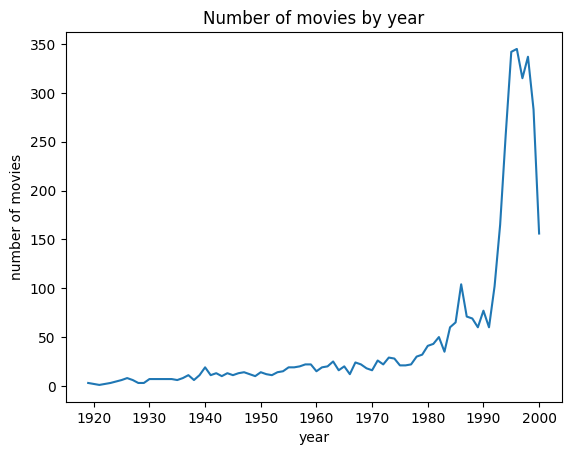

In [48]:
from matplotlib import pylab as plb
plb.plot(moviesByYear.index, moviesByYear["Film"])
plb.xlabel("year")
plb.ylabel("number of movies")
plb.title("Number of movies by year");
#; surpresses the text output